In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from icecream import ic
import os
import numpy as np
from src.dataset import (
    MultipleDates,
    PA, PADistanceMap, PAMultipleDates,
    MTMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates, PatchesHandlerEvidential

from src.trainer.evidential import TrainerEvidential, TrainerEvidentialUEO
import src.trainer.evidential as evidential

from mpl_toolkits.axes_grid1 import make_axes_locatable

import cv2
from src import metrics as _metric
from src.trainer.evidential import getMassFcn2D
import pandas as pd
import sys

In [22]:
import pickle
# filename = 'log_evidential_dirichletplot1.pkl'
folder = 'output/log/'

filenames = ['log_evidential_wmse_pa.pkl']

# filenames = ['log_evidential_wdice_mt.pkl']

filenames = ['log_wdice_pastdate_pa.pkl'] # wdice pa
filenames = ['log_evidential_wdice_mt_early_date.pkl', 'log_evidential_wdice_mt_early_date2.pkl'] # wdice mt early date




# filenames = ['log_mcd_classesmode_true_pa.pkl']
# filenames = ['log_mcd_classesmode_false_pa.pkl']

filenames = ['log_single_run_classesmodetrue_pa.pkl']
filenames = ['log_single_run_classesmodefalse_pa.pkl']

filenames = ['log_wdice_pastdate_pa.pkl']
filenames = ['log_mcd_classesmode_true_pa_early_date.pkl']

filenames = ['log_mcd_pa.pkl']
filenames = ['log_single_run.pkl']

filenames = [
    'log_evidential_dirichletplot1_pa.pkl',
    'log_evidential_dirichletplot2_pa.pkl'
             ]

filename_ensemble = 'log_ensemble_pa_current_classesmode2_2.pkl'
filename_mcd = 'log_mcd_pa_classesmode2.pkl'

filenames = ['log_mcd_pa_earlydate_classesmode_false.pkl']

filenames = ['log_single_run_pa_early_date_pred_entropy.pkl']
filenames = ['log_mcd_mt_current_date_pred_entropy.pkl']
filenames = ['log_evidential_wdice_mt.pkl']

filenames = ['log_mcd_mt_current_date_single_run.pkl']

filenames = ['log_single_run.pkl']

#filename_mcd = 'log_mcd_pa_earlydate_classesmode_false.pkl'
results = []
for filename in filenames:
    with open(os.path.join(folder, filename), 'rb') as handle:
        results.extend(pickle.load(handle))
        print(len(results))
# print(results)
# print(len(results))

3


In [23]:
import pandas as pd
df = pd.DataFrame(columns=['sUEO','ECE (10 bins)','F1','F1 low','F1 high','F1 audit','UEO'])


In [24]:
[results[x]['other_uncertainty_metrics']['sUEO'] for x in range(len(results))]


[0.841080483916035, 0.8141570958729208, 0.8569092307938756]

In [25]:

df['sUEO'] = [np.round(results[x]['other_uncertainty_metrics']['sUEO'], 3) for x in range(len(results))]
df['ECE (10 bins)'] = [np.round(results[x]['other_uncertainty_metrics']['ece_score'], 3) for x in range(len(results))]
df['F1'] = [np.round(results[x]['uncertainty_result']['metrics']['f1'], 1) for x in range(len(results))]

df['F1 low'] = [np.round(np.squeeze(results[x]['uncertainty_result']['metrics']['f1_L'])*100, 1) for x in range(len(results))]
df['F1 high'] = [np.round(np.squeeze(results[x]['uncertainty_result']['metrics']['f1_H'])*100, 1) for x in range(len(results))]
df['F1 audit'] = [np.round(np.squeeze(results[x]['uncertainty_result']['metrics_audited']['f1'])*100, 1) for x in range(len(results))]
df['UEO'] = [np.round(np.squeeze(results[x]['uncertainty_result']['metrics']['UEO']), 3) for x in range(len(results))]

print(df.squeeze())

    sUEO  ECE (10 bins)    F1  F1 low  F1 high  F1 audit    UEO
0  0.841          0.004  84.5    96.3     70.2      98.0  0.116
1  0.814          0.005  82.0    95.1     60.1      96.9  0.134
2  0.857          0.004  86.0    96.9     71.6      98.2  0.108


In [21]:
df.to_csv('output/log/results.csv', index=False)

In [15]:
df['UEO'].squeeze()

0    0.234
1    0.540
2    0.159
3    0.264
4    0.188
5    0.197
6    0.139
7    0.168
8    0.199
9    0.269
Name: UEO, dtype: float64

In [ ]:
sys.exit()

In [21]:
df

other_uncertainty_metrics  \
0  {'sUEO': 0.7839971539675619, 'ece_score': 0.00...   
1  {'sUEO': 0.8041494548302841, 'ece_score': 0.00...   
2  {'sUEO': 0.7923163636949743, 'ece_score': 0.00...   
3  {'sUEO': 0.7466702960925143, 'ece_score': 0.00...   
4  {'sUEO': 0.7562942377819136, 'ece_score': 0.00...   
5  {'sUEO': 0.8101692428580063, 'ece_score': 0.00...   
6  {'sUEO': 0.7043056693116115, 'ece_score': 0.00...   
7  {'sUEO': 0.8230671787847574, 'ece_score': 0.00...   
8  {'sUEO': 0.8223277054015209, 'ece_score': 0.00...   
9  {'sUEO': 0.759877800041655, 'ece_score': 0.003...   

                                 snippet_poi_results  \
0  [{'snippet_id': 0, 'coords': [550, 550], 'refe...   
1  [{'snippet_id': 0, 'coords': [550, 550], 'refe...   
2  [{'snippet_id': 0, 'coords': [550, 550], 'refe...   
3  [{'snippet_id': 0, 'coords': [550, 550], 'refe...   
4  [{'snippet_id': 0, 'coords': [550, 550], 'refe...   
5  [{'snippet_id': 0, 'coords': [550, 550], 'refe...   
6  [{'snippet_id': 0, 'coords': [550, 550], 'refe...   
7  [{'snippet_id': 0, 'coords': [550, 550], 'refe...   
8  [{'snippet_id': 0, 'coords': [550, 550], 'refe...   
9  [{'snippet_id': 0, 'coords': [550, 550], 'refe...   

                                  uncertainty_result      sUEO  ECE (10 bins)  \
0  {'metrics': {'precision_L': [0.982861155854796...  0.783997       0.009056   
1  {'metrics': {'precision_L': [0.959334479473052...  0.804149       0.005224   
2  {'metrics': {'precision_L': [0.994853445740613...  0.792316       0.003399   
3  {'metrics': {'precision_L': [0.979749083915137...  0.746670       0.006812   
4  {'metrics': {'precision_L': [0.995407236081282...  0.756294       0.009532   
5  {'metrics': {'precision_L': [0.994664334843350...  0.810169       0.001705   
6  {'metrics': {'precision_L': [0.766449546540089...  0.704306       0.009236   
7  {'metrics': {'precision_L': [0.992640366021635...  0.823067       0.004541   
8  {'metrics': {'precision_L': [0.991071596186843...  0.822328       0.002469   
9  {'metrics': {'precision_L': [0.838910749636079...  0.759878       0.003034   

      F1                F1 low               F1 high              F1 audit  \
0  80.22  [0.9334092021860816]  [0.6159489603202195]  [0.9649174421425722]   
1  81.60  [0.9258367108281401]  [0.6515650648947586]  [0.9590503771421633]   
2  78.63  [0.9201277748365171]  [0.6601608346675173]  [0.9654045070284258]   
3  75.65  [0.9169724177224597]  [0.5216105348839083]  [0.9578731123900392]   
4  77.08  [0.9293300716601526]  [0.5912282295079676]   [0.968031470351418]   
5  79.69  [0.9089577279293845]  [0.7133024545587622]  [0.9655957226547891]   
6  72.73   [0.829710571698666]  [0.5000714789896444]  [0.8914447147735536]   
7  82.20  [0.9447843353726789]  [0.6389725882682128]  [0.9702105364750652]   
8  81.72  [0.9220239166010272]  [0.7358890188940891]  [0.9688526179860486]   
9  75.60  [0.8602965919209237]  [0.6380850717487666]  [0.9324140093294593]   

                     UEO  
0  [0.12200526904296963]  
1  [0.11066470315784473]  
2   [0.1330689067032569]  
3  [0.14086930314072574]  
4  [0.14006764957234266]  
5  [0.12397651180053304]  
6  [0.12473645167960327]  
7  [0.11369032455291181]  
8  [0.11686216797932975]  
9  [0.13402999453390688]

In [19]:
results[0]['other_uncertainty_metrics']

{'sUEO': 0.7839971539675619, 'ece_score': 0.009056430736761583}

In [5]:


import matplotlib.pyplot as plt
for poi_id in range(6):
    plt.figure()
        
    for idx, result in enumerate(results):
        # print("idx: {}, alpha: {}".format(idx, result['snippet_poi_results'][poi_id]['alpha']))
        # if result['uncertainty_result']['metrics']['f1'] > 0:
        if True:
        
            print("exp_id,",result['uncertainty_result']['exp'])
            print("idx: {}, other uncertainty metrics: {}".format(idx, result['other_uncertainty_metrics']))
            print("f1: {}".format(result['uncertainty_result']['metrics']['f1']))
            print("f1_L: {}, f1_H: {}, f1_audit: {}".format(
                result['uncertainty_result']['metrics']['f1_L'],
                result['uncertainty_result']['metrics']['f1_H'],
                result['uncertainty_result']['metrics_audited']['f1']))
            print("UEO",result['uncertainty_result']['metrics']['UEO'])

            

            
            # plt.figure()
            # getMassFcn2D(result['snippet_poi_results'][poi_id]['alpha'], normalize_pvals=True)

exp_id, 123
idx: 0, other uncertainty metrics: {'sUEO': 0.7839971539675619, 'ece_score': 0.009056430736761583}
f1: 80.22
f1_L: [0.9334092], f1_H: [0.61594896], f1_audit: [0.96491744]
UEO [0.12200527]
exp_id, 124
idx: 1, other uncertainty metrics: {'sUEO': 0.8041494548302841, 'ece_score': 0.00522430398120885}
f1: 81.6
f1_L: [0.92583671], f1_H: [0.65156506], f1_audit: [0.95905038]
UEO [0.1106647]
exp_id, 125
idx: 2, other uncertainty metrics: {'sUEO': 0.7923163636949743, 'ece_score': 0.0033990663813169386}
f1: 78.63
f1_L: [0.92012777], f1_H: [0.66016083], f1_audit: [0.96540451]
UEO [0.13306891]
exp_id, 126
idx: 3, other uncertainty metrics: {'sUEO': 0.7466702960925143, 'ece_score': 0.006811578071541969}
f1: 75.65
f1_L: [0.91697242], f1_H: [0.52161053], f1_audit: [0.95787311]
UEO [0.1408693]
exp_id, 127
idx: 4, other uncertainty metrics: {'sUEO': 0.7562942377819136, 'ece_score': 0.009531915407839672}
f1: 77.08
f1_L: [0.92933007], f1_H: [0.59122823], f1_audit: [0.96803147]
UEO [0.14006765]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
results

[{'other_uncertainty_metrics': {'sUEO': 0.3845722890780702, 'ece_score': 0},
  'snippet_poi_results': [{'snippet_id': 0,
    'coords': [550, 550],
    'reference': 0,
    'predicted': 0.0,
    'alpha': array([132.42505,   1.     ,   1.     ], dtype=float32)},
   {'snippet_id': 0,
    'coords': [210, 610],
    'reference': 1,
    'predicted': 0.0,
    'alpha': array([1., 1., 1.], dtype=float32)},
   {'snippet_id': 0,
    'coords': [207, 617],
    'reference': 1,
    'predicted': 0.0,
    'alpha': array([1., 1., 1.], dtype=float32)},
   {'snippet_id': 0,
    'coords': [800, 200],
    'reference': 1,
    'predicted': 1.0,
    'alpha': array([ 1.     , 49.57395,  1.     ], dtype=float32)},
   {'snippet_id': 1,
    'coords': [550, 115],
    'reference': 1,
    'predicted': 0.0,
    'alpha': array([1.       , 1.5210117, 1.       ], dtype=float32)},
   {'snippet_id': 1,
    'coords': [430, 950],
    'reference': 0,
    'predicted': 0.0,
    'alpha': array([1., 1., 1.], dtype=float32)}],
  'un

In [ ]:
## ensemble load

classes_mode = True
with open(os.path.join(folder, filename_ensemble), 'rb') as handle:
    results_ensemble = pickle.load(handle)

if classes_mode == True:
    for idx in range(len(results_ensemble)):
        results_ensemble[idx]['predicted'] = results_ensemble[idx]['predicted'][..., 1]

In [ ]:
with open(os.path.join(folder, filename_mcd), 'rb') as handle:
    results_mcd = pickle.load(handle)

if classes_mode == True:
    for idx in range(len(results_mcd)):
        for idx_poi in range(6):
            results_mcd[idx]['snippet_poi_results'][idx_poi]['predicted'] = results_mcd[idx]['snippet_poi_results'][idx_poi]['predicted'][..., 1]

In [ ]:
results_mcd[0]['snippet_poi_results'][0]['predicted']

array([8.9972190e-07, 7.0598844e-08, 5.2811172e-10, 1.9661840e-03,
       2.8240556e-05, 9.0524991e-05, 2.4690071e-11, 9.8261789e-06,
       1.9624058e-05, 7.0873229e-04], dtype=float32)

In [ ]:
len(results_ensemble)

6

In [ ]:
results_ensemble

[{'snippet_id': 0,
  'coords': [550, 550],
  'reference': 0,
  'predicted': array([2.48296004e-07, 4.16432844e-09, 1.68376213e-09, 2.36679583e-07,
         3.45382723e-05, 3.84681698e-06, 1.00834685e-13, 1.32610875e-11,
         1.66440691e-06, 8.39343954e-08], dtype=float32)},
 {'snippet_id': 0,
  'coords': [210, 610],
  'reference': 1,
  'predicted': array([0.4554153 , 0.4598863 , 0.30445483, 0.5327956 , 0.46919134,
         0.5441637 , 0.150321  , 0.36867702, 0.59043163, 0.4161476 ],
        dtype=float32)},
 {'snippet_id': 0,
  'coords': [207, 617],
  'reference': 1,
  'predicted': array([0.16695404, 0.27290606, 0.06870116, 0.17027362, 0.29472125,
         0.2686468 , 0.08341189, 0.23350567, 0.33091488, 0.13750772],
        dtype=float32)},
 {'snippet_id': 0,
  'coords': [800, 200],
  'reference': 1,
  'predicted': array([0.9783321 , 0.95730126, 0.9738133 , 0.9824706 , 0.9548207 ,
         0.9815175 , 0.9982268 , 0.9015372 , 0.9748803 , 0.9828547 ],
        dtype=float32)},
 {'snip

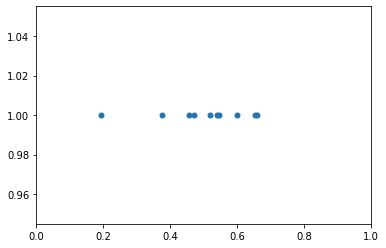

In [ ]:

a = results_ensemble[4]['predicted']
y = np.ones(np.shape(a))   # Make all y values the same
plt.plot(a,y,'.',ms = 10)  # Plot a line at each location specified in a
plt.xlim([0, 1])
# plt.axis('off')
plt.show()

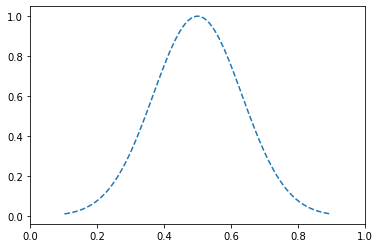

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
a = results_ensemble[4]['predicted']

def plot_norm_pdf(a, line_style = '--'):
    mu = np.mean(a)
    variance = np.var(a)
    sigma = math.sqrt(variance)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    pdf = stats.norm.pdf(x, mu, sigma)
    pdf = pdf/np.max(pdf)
    plt.plot(x, pdf,line_style)
    plt.xlim([0, 1])
    # plt.show()

plot_norm_pdf(a)


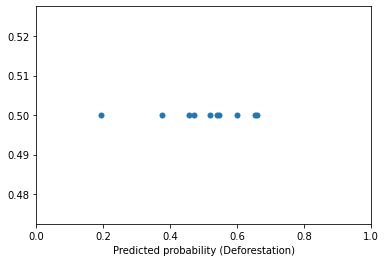

In [ ]:

def plot_points(a, line_style = '.', color='C0'):
    y = np.ones(np.shape(a))*0.5   # Make all y values the same
    plt.plot(a,y,line_style,color=color,ms = 10)  # Plot a line at each location specified in a
    plt.xlim([0, 1])

    plt.xlabel('Predicted probability (Deforestation)')
    '''
    plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        right=False,         # ticks along the top edge are off
        labelleft=False) # labels along the bottom edge are off
    '''
    # plt.axis('off')
    # plt.show()
    # plt.clf()
plot_points(a)


In [ ]:
import pathlib
folder_name = 'output/pdf_plot_results/' 
pathlib.Path(folder_name).mkdir(parents=True, exist_ok=True)

exp_id, 194
idx: 0, other uncertainty metrics: {'sUEO': 0.3845722890780702, 'ece_score': 0}
exp_id, 195
idx: 1, other uncertainty metrics: {'sUEO': 0.4216257755386668, 'ece_score': 0}
exp_id, 196
idx: 2, other uncertainty metrics: {'sUEO': 0.35993511082351887, 'ece_score': 0}
exp_id, 197
idx: 3, other uncertainty metrics: {'sUEO': 0.39539940415724506, 'ece_score': 0}
exp_id, 198
idx: 4, other uncertainty metrics: {'sUEO': 0.053239067948908085, 'ece_score': 0.5106524568504512}
exp_id, 199
idx: 5, other uncertainty metrics: {'sUEO': 0.42596983253086407, 'ece_score': 0.05624375500343817}
exp_id, 200
idx: 6, other uncertainty metrics: {'sUEO': 0.24002797100218876, 'ece_score': 0.09926059301226876}
exp_id, 201
idx: 7, other uncertainty metrics: {'sUEO': 0.37593417277851976, 'ece_score': 0.07479207562590515}
exp_id, 202
idx: 8, other uncertainty metrics: {'sUEO': 0.3972462833082261, 'ece_score': 0.08061046323488832}
exp_id, 203
idx: 9, other uncertainty metrics: {'sUEO': 0.41852756084078635,

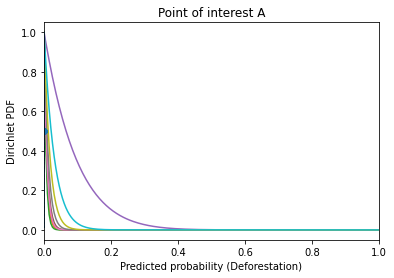

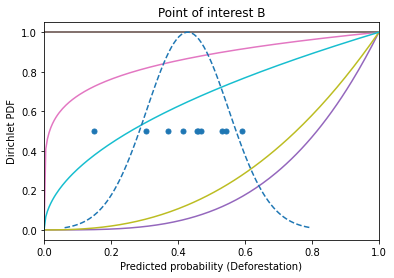

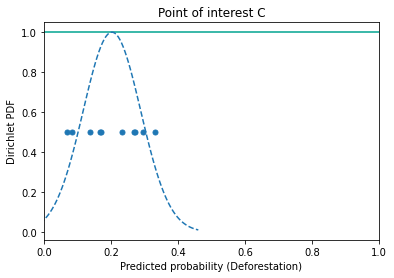

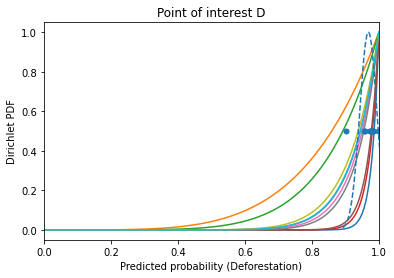

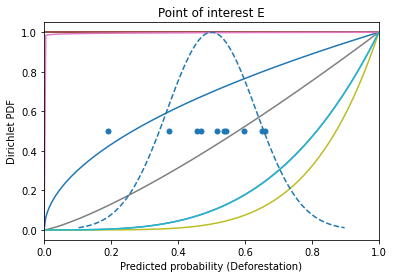

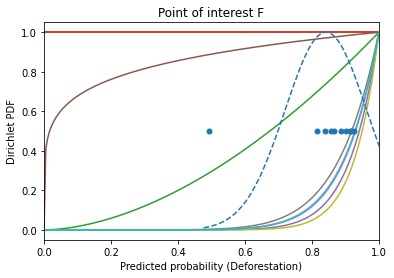

In [ ]:

import matplotlib.pyplot as plt
letters = ['A', 'B', 'C', 'D', 'E', 'F']
for poi_id in range(6):
    plt.figure()
        
    for idx, result in enumerate(results):
        # print("idx: {}, alpha: {}".format(idx, result['snippet_poi_results'][poi_id]['alpha']))
        # if result['uncertainty_result']['metrics']['f1'] > 0:
        if True:
        
            print("exp_id,",result['uncertainty_result']['exp'])
            print("idx: {}, other uncertainty metrics: {}".format(idx, result['other_uncertainty_metrics']))


            
            getMassFcn2D(result['snippet_poi_results'][poi_id]['alpha'], normalize_pvals=True)
    # for idx, result in enumerate(results_mcd):
    #     plot_norm_pdf(result['snippet_poi_results'][poi_id]['predicted'], '*')
    plot_norm_pdf(results_ensemble[poi_id]['predicted'])
    plot_points(results_ensemble[poi_id]['predicted'], '.', color='C0')
    plt.title('Point of interest {}'.format(letters[poi_id]))
    filename = "result_evidential_poi{}.png".format(poi_id)
    plt.savefig("{}/{}".format(folder_name, filename), bbox_inches ="tight", dpi=150)
            

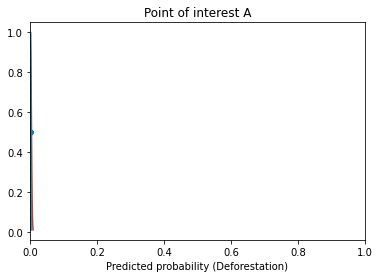

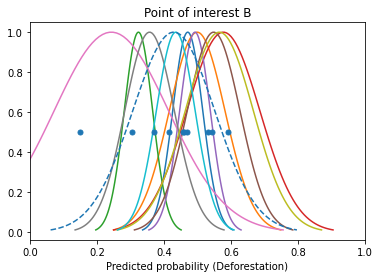

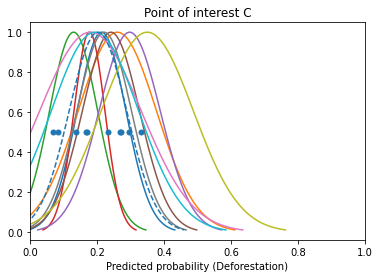

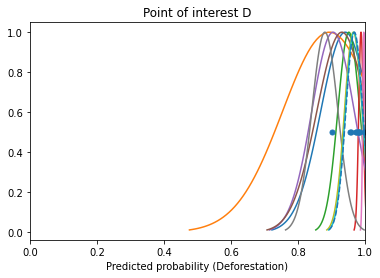

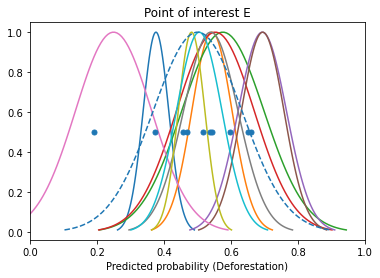

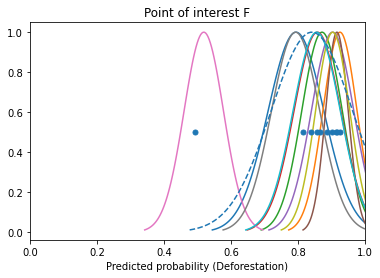

In [ ]:

import matplotlib.pyplot as plt
for poi_id in range(6):
    plt.figure()

    for idx, result in enumerate(results_mcd):
        plot_norm_pdf(result['snippet_poi_results'][poi_id]['predicted'], '-')
        # plot_points(result['snippet_poi_results'][poi_id]['predicted'], '.', color='C0')
    plot_norm_pdf(results_ensemble[poi_id]['predicted'])
    plot_points(results_ensemble[poi_id]['predicted'], '.', color='C0')
    plt.title('Point of interest {}'.format(letters[poi_id]))
    filename = "result_mcd_poi{}.png".format(poi_id)
    plt.savefig("{}/{}".format(folder_name, filename), bbox_inches ="tight", dpi=150)